###Distancia Manhattan

In [4]:
import random
import numpy as np      # Manejo de arreglos (álgebra lineal en Python)
import pandas as pd     # Manejo de Dataframes (tipo de datos)
import matplotlib.pyplot as plt   # Gráficas
import seaborn as sns     # Gráficas estadísticas (histogramas)

In [5]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSLo2NoEd47ZPZnEeDQBO95NHxvMsUi7YG4nH9DEiDfMJIV2q5Qk0fPQX5J10ClRB7ixPrCbfkTHcTh/pub?output=csv"
data= pd.read_csv(url)

In [6]:
# Imputar datos faltantes para las categorías de GK cambiando NaN por 0
gk_columns = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
data[gk_columns] = data[gk_columns].fillna(0)

In [7]:
columnas_objetivo = ['Name', 'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration',
       'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots',
       'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Weak foot', 'Skill moves', 'Age', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Preferred foot',
       'Nation', 'Position']  # Lista de columnas que se quieren mantener

columnas = data.columns  # Obtener los nombres de todas las columnas del DataFrame

for col in columnas:
  if col not in columnas_objetivo:
    data.drop(col, axis=1, inplace=True)  # Si una columna no está en la lista de columnas objetivo, se elimina
  else:
    data[col] = data[col]  # Si la columna está en la lista, se deja intacta

In [31]:
### Ahora obtendremos los valores de los datos
X = data.iloc[:, 1:-1].values  ### seleccionamos las filas y un subconjunto de columnas (excluyendo la primera y la última)
y = data.iloc[:,-1].values     ### tomamos los valores de la última columna
y


array(['ST', 'CDM', 'ST', ..., 'CM', 'CM', 'LM'], dtype=object)

In [9]:
### Convertir el pie preferido en una variable numérica
from sklearn.preprocessing import LabelEncoder

# Inicializamos el codificador
le = LabelEncoder()

# Convertir a formato numérico la penúltima columna (Preferred foot)
X[:, -2] = le.fit_transform(X[:, -2])

# Convertir a numérico la última columna (Nation)
X[:, -1] = le.fit_transform(X[:, -1])

# Comprobar los resultados
print(X[:, -2:])  # Mostrar las últimas dos columnas para verificar cómo quedaron codificadas

[[1 50]
 [1 128]
 [0 106]
 ...
 [1 146]
 [0 135]
 [0 37]]


In [10]:
df = pd.DataFrame(X)
for col in df.columns:
    # Convertir cada columna a formato numérico, asignando NaN en caso de error
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [11]:
X = df.values
X

array([[ 91.,  97.,  90., ...,   0.,   1.,  50.],
       [ 91.,  66.,  80., ...,   0.,   1., 128.],
       [ 91.,  88.,  92., ...,   0.,   0., 106.],
       ...,
       [ 53.,  60.,  58., ...,   0.,   1., 146.],
       [ 53.,  61.,  52., ...,   0.,   0., 135.],
       [ 53.,  60.,  49., ...,   0.,   0.,  37.]])

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')  # Crear un imputador que reemplaza los valores NaN por la mediana

imputer.fit(X)  # Ajustar el imputador a los datos, calculando la mediana para cada columna
X = imputer.transform(X)  # Reemplazar los valores faltantes con la mediana calculada
X  # Mostrar los datos transformados

array([[ 91.,  97.,  90., ...,   0.,   1.,  50.],
       [ 91.,  66.,  80., ...,   0.,   1., 128.],
       [ 91.,  88.,  92., ...,   0.,   0., 106.],
       ...,
       [ 53.,  60.,  58., ...,   0.,   1., 146.],
       [ 53.,  61.,  52., ...,   0.,   0., 135.],
       [ 53.,  60.,  49., ...,   0.,   0.,  37.]])

In [13]:
X_ = X[:,:-1]  #### Eligiendo todos los datos, excepto la nacionalidad
X_

array([[91., 97., 90., ...,  0.,  0.,  1.],
       [91., 66., 80., ...,  0.,  0.,  1.],
       [91., 88., 92., ...,  0.,  0.,  0.],
       ...,
       [53., 60., 58., ...,  0.,  0.,  1.],
       [53., 61., 52., ...,  0.,  0.,  0.],
       [53., 60., 49., ...,  0.,  0.,  0.]])

In [14]:
from sklearn.decomposition import PCA
# X_ = X[:,:-1]
# Crear un objeto PCA y ajustar los datos
pca = PCA(n_components=3)  # Queremos las tres primeras componentes principales
X_pca = pca.fit_transform(X_)

In [15]:
varianza = pca.explained_variance_ratio_

In [16]:
def distancia_L1(x, c):
    return np.sum(np.abs(x - c))  # Calcula la suma de las distancias absolutas entre dos puntos

# Inicialización de variables
k = 4  # Número de grupos
dimension = X_.shape[0]  # Cantidad de puntos de datos
clusters_manuales_l1 = np.zeros(dimension)
distancias = np.zeros((dimension, k))
centroids_l1 = X_[random.sample(range(dimension), k)]
tol = 1e-6
error = 100

# Continuar iterando hasta que el cambio en los centroides sea lo suficientemente pequeño
while error > tol:
    # Asignar cada punto al cluster más cercano
    for i in range(dimension):
        for j in range(k):
            distancias[i, j] = distancia_L1(X_[i], centroids_l1[j])
        clusters_manuales_l1[i] = np.argmin(distancias[i])

    # Guardar los centroides antiguos antes de la actualización
    centroids_prev_l1 = np.copy(centroids_l1)

    # Recalcular los centroides
    for l in range(k):
        puntos_cluster = X_[clusters_manuales_l1 == l]

        # Si el cluster tiene puntos, actualiza su centroide
        if len(puntos_cluster) > 0:
            centroids_l1[l] = np.mean(puntos_cluster, axis=0)
        else:
            # Si un cluster está vacío, se reasigna el centroide a un punto aleatorio
            print(f"Cluster {l} está vacío, reasignando un centroide al azar")
            centroids_l1[l] = X_[np.random.choice(dimension)]

    # Calcular el error como el cambio promedio en los centroides
    error = np.mean([distancia_L1(centroids_l1[l], centroids_prev_l1[l]) for l in range(k)])
    print(error)

237.3430943164057
26.17045474490623
14.515923613485958
7.696722240177854
4.396143360275323
3.50126798450718
2.3152336630355244
1.6911510273709593
1.1471210287385207
0.9085929295993533
0.8036780063376731
0.584381008456764
0.6239799360341185
0.580043754721098
0.6008175961030491
0.5211121109240306
0.7274512845960099
0.6774563503675682
0.5558345265335896
0.5316196697024448
0.5147826698982761
0.39471376994548035
0.3906178040527422
0.31222180295553326
0.38466211576618303
0.3430583344068956
0.14078986311346844
0.15391868128063277
0.06431452485917899
0.0


In [25]:
clusters_manuales_l1 = clusters_manuales_l1.astype(int)

In [29]:
import seaborn as sns

def graficar_clusters_PCA2D(clusters, metodo, centroides):
    # Generar un gráfico de dispersión utilizando las dos primeras componentes principales
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, alpha=0.8, palette="viridis")

    # Añadir los centroides al gráfico
    plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=100, label='Centroides')

    # Título y etiquetas del gráfico
    plt.title(f'Visualización 2D de la Clusterización (PCA) - {metodo}', fontsize=14)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def graficar_clusters_PCA3D(clusters, metodo):
    # Generar una figura en 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Dibujar los puntos con un borde blanco
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, s=50, alpha=0.9, edgecolor='w')

    # Añadir las etiquetas a los ejes y el título
    ax.set_title(f'Visualización 3D de la Clusterización (PCA) ({metodo})', fontsize=18)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    # Incluir una leyenda
    legend = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend)

    # Mostrar el gráfico en pantalla
    plt.show()

In [20]:
centroids_l1 = np.array(centroids_l1)
centroids_l1 = pca.transform(centroids_l1)

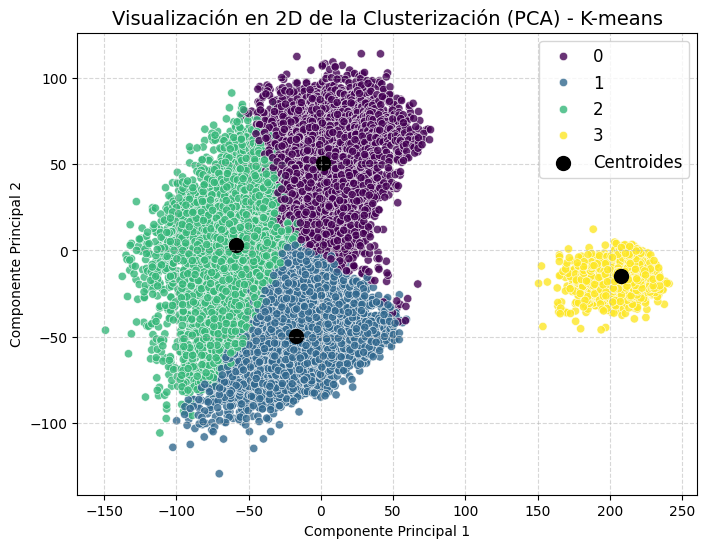

In [30]:
l_1 = graficar_clusters_PCA2D(clusters_manuales_l1, 'K-means', centroids_l1)
l_1

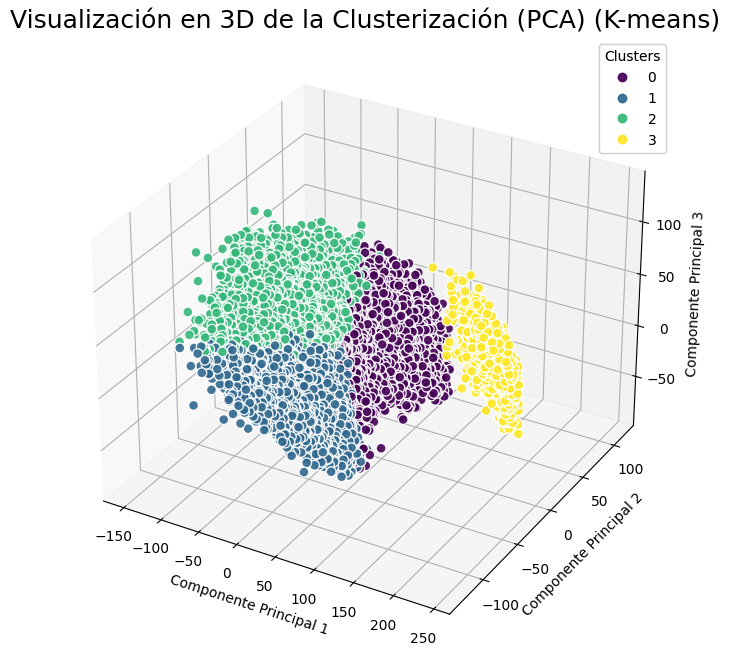

In [22]:

l1_3d = graficar_clusters_PCA3D(clusters_manuales_l1, 'K-means')
l1_3d